> **Jupyter slideshow:** This notebook can be displayed as slides. To view it as a slideshow in your browser, run the following cell:

> `> jupyter nbconvert [this_notebook.ipynb] --to slides --post serve`
 
> To toggle off the slideshow cell formatting, click the `CellToolbar` button, then `View > Cell Toolbar > None`.

<img src="../images/shell-logo.png" width="50" height="50" align="right"/>

<img src="../images/di.png" width="50" height="50" align="right"/>

# Handling Missing Values

In [2]:
# ! jupyter nbconvert Python_intro.ipynb --to slides --post serve

## Learning Objectives
*In this lesson, we will go over the following:*

- Introduction to Handling Missing Values.
- Methods to Handle NA Values.
- Implementation and Exercise

# Introduction


**What are Missing Values ?**

Missing data is defined as the values or data that is not stored (or not present) for some variable/s in the given dataset.

In [4]:
# modules we'll use
import pandas as pd
import numpy as np

In [5]:
# read in all our data
titanic_df = pd.read_csv("../data/titanic.csv")
# nfl_data = pd.read_csv("../data/NFL Play by Play 2009-2017 (v4).csv")
# sf_permits = pd.read_csv("../data/Building_Permits.csv")

# set seed for reproducibility
np.random.seed(0) 

Missing Values

In [7]:
titanic_df.isna().sum() # number of missing values -> Sum

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 Percentage of Missing Values

In [8]:
(titanic_df.isna().sum()/ titanic_df.shape[0])*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Sample Rows with missing values

In [13]:
titanic_df[ titanic_df.Embarked.isna() ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


There are many ways data can end up with missing values. For example
- A 2 bedroom house wouldn't include an answer for _How large is the third bedroom_
- Someone being surveyed may choose not to share their income

Python libraries represent missing numbers as **nan** which is short for "not a number".  You can detect which cells have missing values, and then count how many there are in each column with the command:
```
missing_val_count_by_column = (data.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0
```

Most libraries (including scikit-learn) will give you an error if you try to build a model using data with missing values. So you'll need to choose one of the strategies below.

#### Scenario's of Missing Values

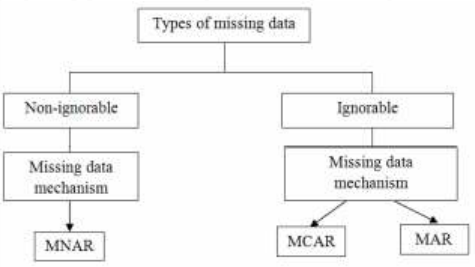

#### Missing Completely at Random (MCAR)

When we say data are missing completely at random, we mean that the missingness has nothing to do with the observation being studied (Completely Observed Variable (X) and Partly Missing Variable (Y)). For example, a weighing scale that ran out of batteries, a questionnaire might be lost in the post, or a blood sample might be damaged in the lab. MCAR is an ideal but unreasonable assumption. Generally, data are regarded as being MCAR when data are missing by design, because of an equipment failure or because the samples are lost in transit or technically unsatisfactory. The statistical advantage of data that are MCAR is that the analysis remains **unbiased**. A pictorial view of MCAR is below where missingness has **no relation to dataset variables X or Y.** Missingness is not related to X or Y but some other reason Z.

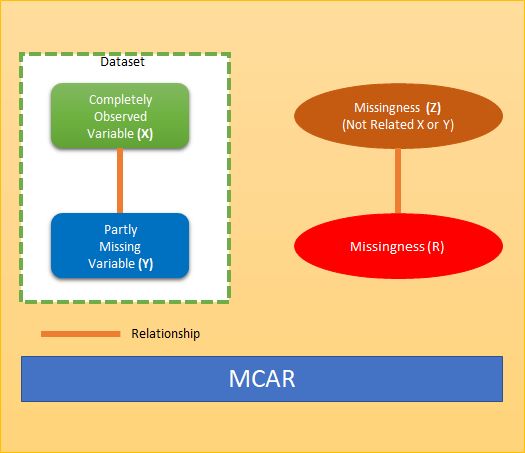

#### Missing at Random(MAR)

When we say data are **missing at random**, we mean that missing data on a partly missing variable (Y) is related to some other completely observed variables(X) in the analysis model but not to the values of Y itself.
A pictorial view of MAR as below where missingness relates to dataset variable X but not with Y. It can have other relationships (Z). It is not specifically related to the missing information. For example, if a child does not attend an examination because the child is ill, this might be predictable from other data about the child’s health, but it would not be related to what we would have examined had the child not been ill. Some may think that MAR does not present a problem. However, MAR does not mean that the missing data can be ignored.

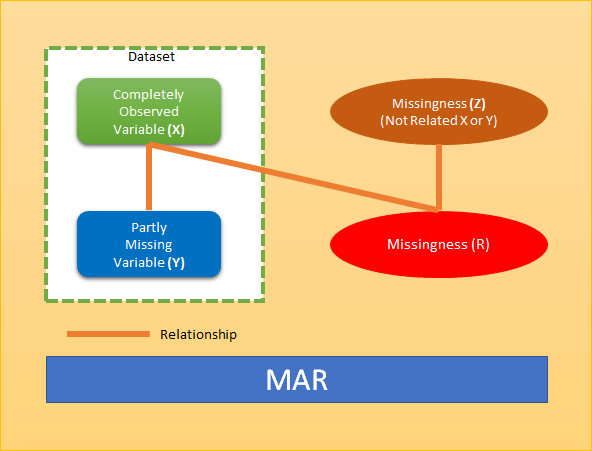

#### Missing not at Random (MNAR)

If the data characters do not meet those of MCAR or MAR, they fall into the category of missing not at random (MNAR). When data are missing, not at random, the missingness is specifically related to what is missing, e.g. a person does not attend a drug test because the person took drugs the night before. A person did not take an English proficiency test due to his poor English language skill. The cases of MNAR data are problematic. The only way to obtain an unbiased estimate of the parameters in such a case is to model the missing data, but that requires proper understanding and domain knowledge of the missing variable. The model may then be incorporated into a more complex one for estimating the missing values. A pictorial view of MNAR is below where missingness directly relates to variable Y. It can have other relationships (X & Z).

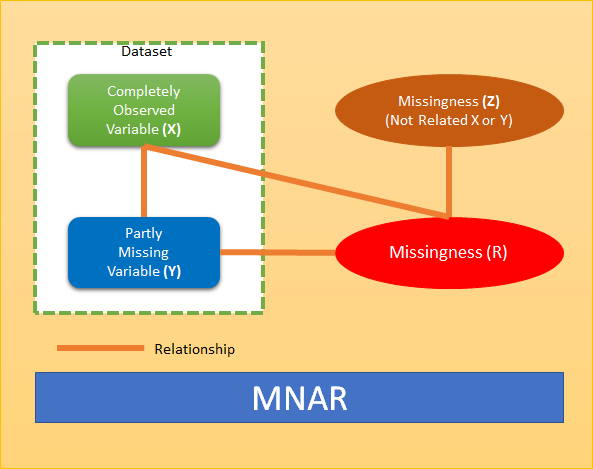

## Solutions

#### 1) A Simple Option: Drop Columns with Missing Values
If your data is in a DataFrame called `original_data`, you can drop columns with missing values. One way to do that is
```
data_without_missing_values = original_data.dropna(axis=1)
```

In many cases, you'll have both a training dataset and a test dataset.  You will want to drop the same columns in both DataFrames. In that case, you would write

```
cols_with_missing = [col for col in original_data.columns 
                                 if original_data[col].isnull().any()]
reduced_original_data = original_data.drop(cols_with_missing, axis=1)
reduced_test_data = test_data.drop(cols_with_missing, axis=1)
```
If those columns had useful information (in the places that were not missing), your model loses access to this information when the column is dropped. Also, if your test data has missing values in places where your training data did not, this will result in an error.  

So, it's somewhat usually not the best solution. However, it can be useful when most values in a column are missing.

#### 2) A Better Option: Imputation
Imputation fills in the missing value with some number. The imputed value won't be exactly right in most cases, but it usually gives more accurate models than dropping the column entirely.

This is done with
```
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
data_with_imputed_values = my_imputer.fit_transform(original_data)
```
The default behavior fills in the mean value for imputation.  Statisticians have researched more complex strategies, but those complex strategies typically give no benefit once you plug the results into sophisticated machine learning models.

One (of many) nice things about Imputation is that it can be included in a scikit-learn Pipeline. Pipelines simplify model building, model validation and model deployment.

#### 3) An Extension To Imputation
Imputation is the standard approach, and it usually works well.  However, imputed values may by systematically above or below their actual values (which weren't collected in the dataset). Or rows with missing values may be unique in some other way. In that case, your model would make better predictions by considering which values were originally missing.  Here's how it might look:
```
# make copy to avoid changing original data (when Imputing)
new_data = original_data.copy()

# make new columns indicating what will be imputed
cols_with_missing = (col for col in new_data.columns 
                                 if new_data[col].isnull().any())
for col in cols_with_missing:
    new_data[col + '_was_missing'] = new_data[col].isnull()

# Imputation
my_imputer = SimpleImputer()
new_data = pd.DataFrame(my_imputer.fit_transform(new_data))
new_data.columns = original_data.columns
```

In some cases this approach will meaningfully improve results. In other cases, it doesn't help at all.

#### <font color = 'blue'>Simple Rule of Thumb</font>
1. Empty Values/ Null Values are more than 30% ----> striaght away column is dropped in 90% cases.
2. If Empty/NUll Values are < 30% ??----> Impute Values or remove rows

Removal Cretieria
1. The dataset should be hugeee.
2. It should not add any bias to our dataset.

In [9]:
# titanic_df

<AxesSubplot:>

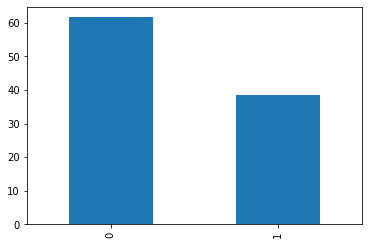

In [10]:
((titanic_df['Survived'].value_counts()/titanic_df.shape[0])*100).plot.bar()

In [11]:
###dropped 
titanic_df.drop(labels=['Cabin'], axis = 1, inplace=True)

In [12]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


### FIlters in Pandas

In [13]:
# filterr = (titanic_df['Age'] < 33) & (titanic_df['Age'] > 22)
# filterr = titanic_df['Pclass'] == 1
filterr = titanic_df['Embarked'].isna()
titanic_df[ filterr    ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


There are 3 technique's which everybody used to imput :
1. Median
2. Mean
3. Mode

In [14]:
filterr = (titanic_df['Pclass'] == 1) &  (titanic_df['Fare']).between(75,85)  &  (titanic_df['Sex'] == 'female')
        
titanic_df[ filterr ]['Embarked'].value_counts()

C    10
S     7
Name: Embarked, dtype: int64

In [15]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

There are 2 missing values in Embarked Column

     Substitute the embarked with Q because the women in Q embared have similar details with the women with missing Embarkment  

In [16]:
titanic_df['Embarked'].fillna(value='C', inplace = True)

#### Age

In [17]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [18]:
titanic_df[ titanic_df['Age'].isna()].shape

(177, 11)

  There are 177 values missing in Age

In [19]:
# titanic_df.groupby('decoration').count()

In [20]:
titanic_df['decoration']  = titanic_df['Name'].apply(lambda x: x.split(" ")[1])

In [21]:
titanic_df['decoration'].value_counts()

Mr.             502
Miss.           179
Mrs.            121
Master.          40
Dr.               7
Rev.              6
y                 4
Planke,           3
Impe,             3
Gordon,           2
Col.              2
Mlle.             2
Major.            2
Melkebeke,        1
Jonkheer.         1
Shawah,           1
the               1
Velde,            1
Capt.             1
Messemaeker,      1
Carlo,            1
Ms.               1
Mme.              1
Steen,            1
Mulder,           1
Pelsmaeker,       1
Walle,            1
der               1
Billiard,         1
Don.              1
Cruyssen,         1
Name: decoration, dtype: int64

In [22]:
# titanic_df['decoration'].value_counts()

In [23]:
deco_dict = titanic_df[ ~titanic_df['Age'].isna() ].groupby('decoration').median()['Age'].to_dict()

In [24]:
titanic_df[ titanic_df['decoration'] == 'Melkebeke,']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,decoration
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5,S,"Melkebeke,"


In [25]:
deco_dict['Melkebeke,'] = deco_dict['Mr.']  ## == 30

In [26]:
titanic_df.loc[ titanic_df['Age'].isna(),'Age'] = titanic_df[ titanic_df['Age'].isna()]   ['Name'].apply(lambda x : deco_dict[  x.split(" ")[1]  ])

### Missing Value Analysis with Time Series Data
- Missing Value Analysis using Knn IMputer, SimpleImputer, ffill, bfill, interpolation

In [56]:
series = pd.date_range(start='2019-01-01', end='2020-12-31', freq='W')
df  = pd.DataFrame(np.random.randint(0, 42, size=(len(series))), 
                   index = series,
                  columns=['data'])


In [61]:
np.random.randint(0,df.shape[0], size = 10)

array([74, 61, 31, 79, 88, 17, 59, 16, 88, 86])

<AxesSubplot:>

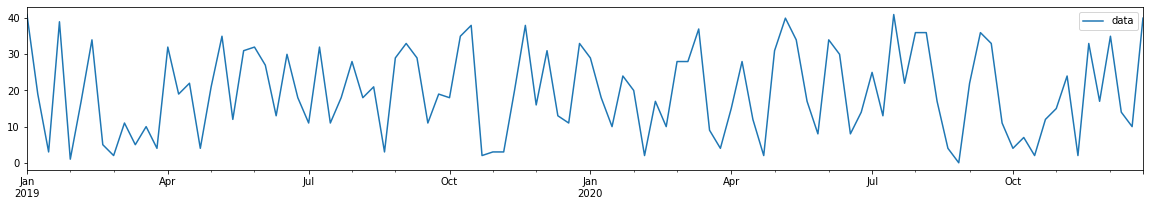

In [58]:
df.plot.line(figsize=(20,3))

### Missing Value Analysis using MICE

In [72]:
import pandas as pd
import numpy as np
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
from fancyimpute import IterativeImputer as MICE
data_fit = pd.DataFrame(MICE().fit_transform(data))

ModuleNotFoundError: No module named 'fancyimpute'

### Missing Value Analysis using Datawig Library

In [66]:
import pandas as pd
# !pip install datawig
import datawig

In [67]:
data = pd.read_csv("../data/titanic.csv")

df_train, df_test = datawig.utils.random_split(data)

#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    input_columns=['Pclass','SibSp','Parch'], # column(s) containing information about the column we want to impute
    output_column= 'Age', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

#Fit an imputer model on the train data
imputer.fit(train_df=df_train, num_epochs=50)

#Impute missing values and return original dataframe with predictions
imputed = imputer.predict(df_test)

2022-04-26 00:40:33,664 [INFO]  
========== start: fit model
2022-04-26 00:40:33,753 [WARNING]  Already bound, ignoring bind()
2022-04-26 00:40:33,845 [INFO]  Epoch[0] Batch [0-20]	Speed: 4937.87 samples/sec	cross-entropy=18.205490	Age-accuracy=0.000000
2022-04-26 00:40:33,906 [INFO]  Epoch[0] Train-cross-entropy=15.707142
2022-04-26 00:40:33,913 [INFO]  Epoch[0] Train-Age-accuracy=0.000000
2022-04-26 00:40:33,921 [INFO]  Epoch[0] Time cost=0.162
2022-04-26 00:40:33,935 [INFO]  Saved checkpoint to "imputer_model\model-0000.params"
2022-04-26 00:40:33,945 [INFO]  Epoch[0] Validation-cross-entropy=15.465446
2022-04-26 00:40:33,947 [INFO]  Epoch[0] Validation-Age-accuracy=0.000000
2022-04-26 00:40:34,025 [INFO]  Epoch[1] Batch [0-20]	Speed: 4449.04 samples/sec	cross-entropy=15.060953	Age-accuracy=0.000000
2022-04-26 00:40:34,095 [INFO]  Epoch[1] Train-cross-entropy=14.186191
2022-04-26 00:40:34,095 [INFO]  Epoch[1] Train-Age-accuracy=0.000000
2022-04-26 00:40:34,095 [INFO]  Epoch[1] Time 

2022-04-26 00:40:36,333 [INFO]  Epoch[14] Time cost=0.148
2022-04-26 00:40:36,357 [INFO]  Saved checkpoint to "imputer_model\model-0014.params"
2022-04-26 00:40:36,368 [INFO]  Epoch[14] Validation-cross-entropy=14.887327
2022-04-26 00:40:36,370 [INFO]  Epoch[14] Validation-Age-accuracy=0.000000
2022-04-26 00:40:36,451 [INFO]  Epoch[15] Batch [0-20]	Speed: 4466.06 samples/sec	cross-entropy=13.506196	Age-accuracy=0.000000
2022-04-26 00:40:36,502 [INFO]  Epoch[15] Train-cross-entropy=12.533418
2022-04-26 00:40:36,504 [INFO]  Epoch[15] Train-Age-accuracy=0.000000
2022-04-26 00:40:36,505 [INFO]  Epoch[15] Time cost=0.130
2022-04-26 00:40:36,512 [INFO]  Saved checkpoint to "imputer_model\model-0015.params"
2022-04-26 00:40:36,519 [INFO]  Epoch[15] Validation-cross-entropy=14.896674
2022-04-26 00:40:36,521 [INFO]  Epoch[15] Validation-Age-accuracy=0.000000
2022-04-26 00:40:36,571 [INFO]  Epoch[16] Batch [0-20]	Speed: 6875.24 samples/sec	cross-entropy=13.470592	Age-accuracy=0.000000
2022-04-26

In [69]:
imputed.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             31
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          140
Embarked         0
Age_imputed      0
dtype: int64

In [70]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64